In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
from sklearn.model_selection import train_test_split

test_df = pd.read_csv("DailyDelhiClimateTest.csv")
train_df = pd.read_csv("DailyDelhiClimateTrain.csv")

#putting the two datasets together
df = pd.concat([test_df, train_df])

print("\n# of null values in each column:")
print(df.isnull().sum())
df_isreal = df.applymap(pd.np.isreal)

print("\n# of rows in the data frame: "+(str(df.shape[0])))

print("\n# of real numbers in each column")
print(df_isreal.sum())


# of null values in each column:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# of rows in the data frame: 1576

# of real numbers in each column
date               0
meantemp        1576
humidity        1576
wind_speed      1576
meanpressure    1576
dtype: int64


## Box Plots (looking for outliers)

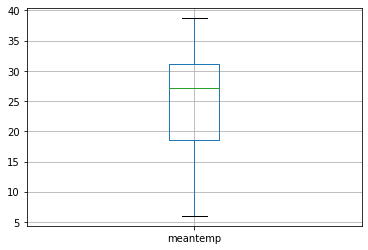

In [2]:
df.boxplot(['meantemp'])

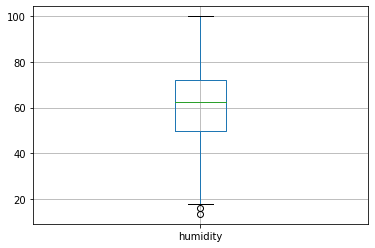

In [3]:
df.boxplot(['humidity'])

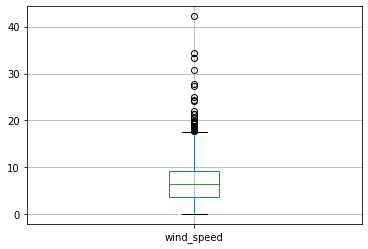

In [4]:
df.boxplot(['wind_speed'])

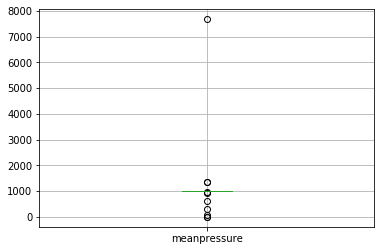

In [5]:
df.boxplot(["meanpressure"])

In [6]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


### Looking for the outliers

In [7]:
df.query("humidity < 17")

,date,meantemp,humidity,wind_speed,meanpressure
120,2013-05-01,31.857143,15.857143,12.685714,1002.833333
856,2015-05-07,35.428571,13.428571,15.342857,1003.571429


In [8]:
df.query("meanpressure > 1200 or meanpressure < 960")

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1182,2016-03-28,25.933333,52.800000,6.546667,7679.333333
1255,2016-06-09,35.733333,43.733333,9.260000,938.066667
1300,2016-07-24,31.437500,72.250000,2.431250,946.312500
1309,2016-08-02,30.687500,72.125000,6.375000,310.437500
1321,2016-08-14,28.933333,83.700000,6.370000,633.900000
1323,2016-08-16,31.333333,66.416667,14.666667,-3.041667
1362,2016-09-24,31.240000,66.480000,5.496154,1352.615385
1416,2016-11-17,21.730769,51.730769,11.550000,1350.296296
1427,2016-11-28,22.454545,37.318182,9.185714,12.045455


In [9]:
df.query("wind_speed > 20")

,date,meantemp,humidity,wind_speed,meanpressure
59,2013-03-01,17.333333,49.333333,24.066667,1016.333333
251,2013-09-09,31.000000,57.500000,42.220000,1007.000000
358,2013-12-25,13.666667,63.166667,34.487500,1020.625000
370,2014-01-06,11.428571,86.285714,27.337500,1017.625000
371,2014-01-07,12.142857,72.285714,20.600000,1017.750000
527,2014-06-12,32.875000,39.250000,24.325000,997.000000
589,2014-08-13,32.125000,57.714286,20.825000,998.250000
630,2014-09-23,31.000000,47.000000,30.685714,1004.285714
654,2014-10-17,25.000000,47.666667,25.012500,1013.625000
655,2014-10-18,24.000000,56.142857,21.300000,1012.875000


### Dropping meanpressure's outliers

In [10]:
df1 = df.drop([1182, 1323, 1427, 1321, 1309, 0, 1416, 1362, 1255, 1300])

In [11]:
df1.corr()

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.576848,0.287002,-0.880832
humidity,-0.576848,1.000000,-0.372298,0.343049
wind_speed,0.287002,-0.372298,1.000000,-0.273489
meanpressure,-0.880832,0.343049,-0.273489,1.000000


Dropping the outliers for meanpressure increased its correlation to all other variables significantly. So we decided to drop the values that were siginficantly away from boxplot. Dropping the outliers of humidity did not affect the correlation, so we decided against. We decided againt dropping wind values because their realistic varibaility in win speed depending on things like storms, etc.

### Density Plots

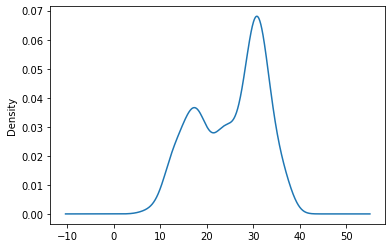

In [12]:
df1['meantemp'].plot.kde()

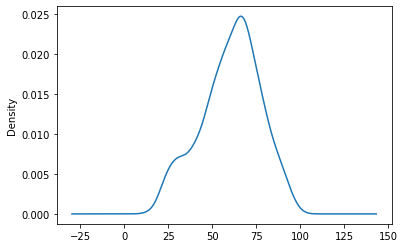

In [13]:
df1['humidity'].plot.kde()

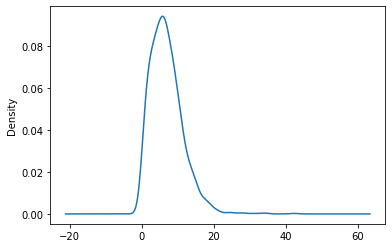

In [14]:
df['wind_speed'].plot.kde()

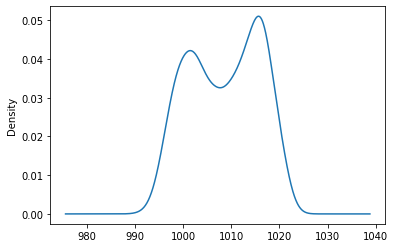

In [15]:
df1['meanpressure'].plot.kde()

### Normalizing age datas by using the min/max scalar. 

In [16]:

df_num = df1[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].values.astype(float)
min_max_scaler = prep.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_num)
normalized = pd.DataFrame(x_scaled)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25299940>,
      dtype=object)

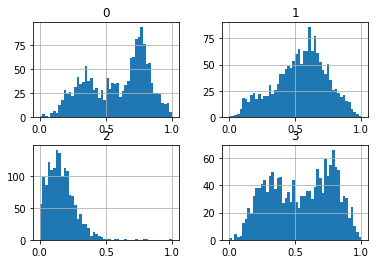

In [17]:
normalized.hist(bins=50)

Data has been put on a min-max scalar.

In [18]:
#renaming the columns
names = ['meantemp', 'wind_speed', 'humidity','mean_pressure']
normalized.columns = names

## Creating 3 models w/ different parameters and testing them. 

In [55]:
x = normalized[['wind_speed', 'humidity','mean_pressure']]
y = normalized[['meantemp']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

for num, col in enumerate(X_train.columns):
    print("Coeff. " +col+ " is " + str(model1.coef_[0][num]))

intercept = model1.intercept_[0]
print("The intercept for model 1 is {}".format(intercept))

print("\nR^2 is " +str(model1.score(X_test, y_test)))

from sklearn.metrics import mean_squared_error

y_predict = model1.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

print("RMSE is " +str(regression_model_mse))

Coeff. wind_speed is -0.3712333926687932
Coeff. humidity is -0.1154024363089267
Coeff. mean_pressure is -0.7594498976126792
The intercept for model 1 is 1.2183552157972277

R^2 is 0.8472686899850255
RMSE is 0.007308941146797836


In [53]:
x = normalized[['humidity','mean_pressure']]
y = normalized[['meantemp']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

for num, col in enumerate(X_train.columns):
    print("Coeff. " +col+ " is " + str(model1.coef_[0][num]))

intercept = model2.intercept_[0]
print("The intercept for model 2 is {}".format(intercept))

print("\nR^2 is " +str(model1.score(X_test, y_test)))

from sklearn.metrics import mean_squared_error

y_predict = model2.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

print("RMSE is " +str(regression_model_mse))

Coeff. humidity is 0.07823117536263889
Coeff. mean_pressure is -0.8405152295029488
The intercept for model 2 is 1.028313957086047

R^2 is 0.758289408368042
RMSE is 0.01156703552547578


In [52]:
x = normalized[['mean_pressure', "wind_speed"]]
y = normalized[['meantemp']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

for num, col in enumerate(X_train.columns):
    print("Coeff. " +col+ " is " + str(model1.coef_[0][num]))

intercept = model2.intercept_[0]
print("The intercept for model 2 is {}".format(intercept))

print("\nR^2 is " +str(model1.score(X_test, y_test)))

from sklearn.metrics import mean_squared_error

y_predict = model2.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

print("RMSE is " +str(regression_model_mse))

Coeff. mean_pressure is 0.07823117536263889
Coeff. wind_speed is -0.8405152295029488
The intercept for model 2 is 1.184444821463554

R^2 is 0.25051724264992703
RMSE is 0.007273857818844148


Model 1 was the best model to predict mean tempertures. Model 1 used all parametes w/ mean_pressure havings its outliers eliminated. The model was good. The RMSE is significantly low and the R^2 value or accuracy score was very close to 1. However maybe using 3 varibales may have RMSE and R^2 values inflated.  